In [59]:
import pandas as pd

titanic = pd.read_csv("https://peter.butka.website.tuke.sk/test/titanic2.csv")

In [60]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family,has_family,fare_ordinal,title,title_short,age_ordinal,deck
0,1,1,female,29.00,0,0,24160,211.3375,B5,Southampton,0,False,most expensive,Miss,Miss,adult,B
1,1,1,male,0.92,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Master,rare title,child,C
2,1,0,female,2.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Miss,Miss,child,C
3,1,0,male,30.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mr,Mr,adult,C
4,1,0,female,25.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mrs,Mrs,adult,C


In [61]:
titanic["survived"] = titanic["survived"].astype("boolean").astype("string")

<AxesSubplot:>

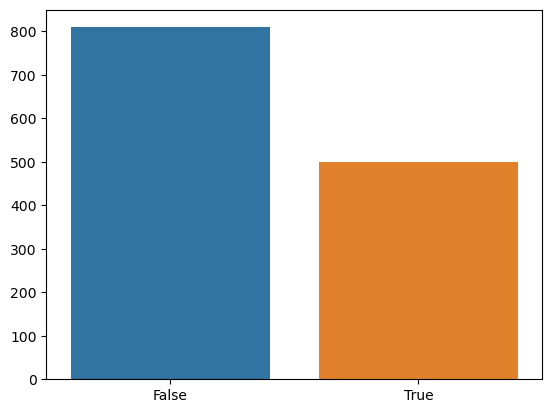

In [64]:
import seaborn as sns

sns.barplot(x=titanic["survived"].value_counts().index, y=titanic["survived"].value_counts().values)

In [65]:
titanic["age_d"] =  titanic.apply(lambda row: "adult" if row["age"] > 18 else "child", axis=1)  

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic["sex"])
titanic["sex"] = le.transform(titanic["sex"])

le = LabelEncoder()
le.fit(titanic["age_d"])
titanic["age_d"] = le.transform(titanic["age_d"])

In [70]:
train_data = titanic.sample(frac=0.8)
test_data = titanic.drop(train_data.index)

In [74]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()

tree.fit(train_data[["pclass", "sex", "fare", "age_d"]], train_data[["survived"]])

DecisionTreeClassifier()

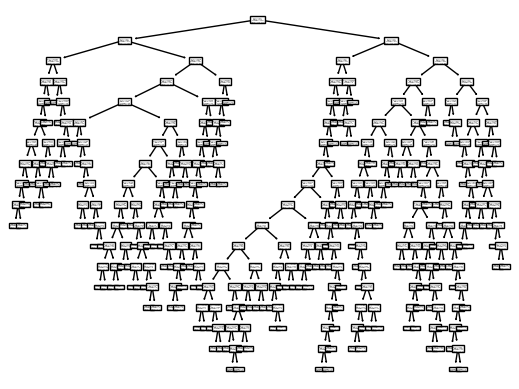

In [77]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plot_tree(tree)
plt.show()

In [79]:
from sklearn.metrics import classification_report
print(classification_report(test_data[["survived"]], tree.predict(test_data[["pclass", "sex", "fare", "age_d"]])))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87       179
        True       0.75      0.64      0.69        83

    accuracy                           0.82       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.81      0.82      0.81       262

